In [7]:
import os 
import numpy as np
import cv2 as cv2
import tensorflow as tf
import os
np.random.seed(0)
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
print(tf.__version__)


2.12.0


1/1 [==============================] - 0s 98ms/step


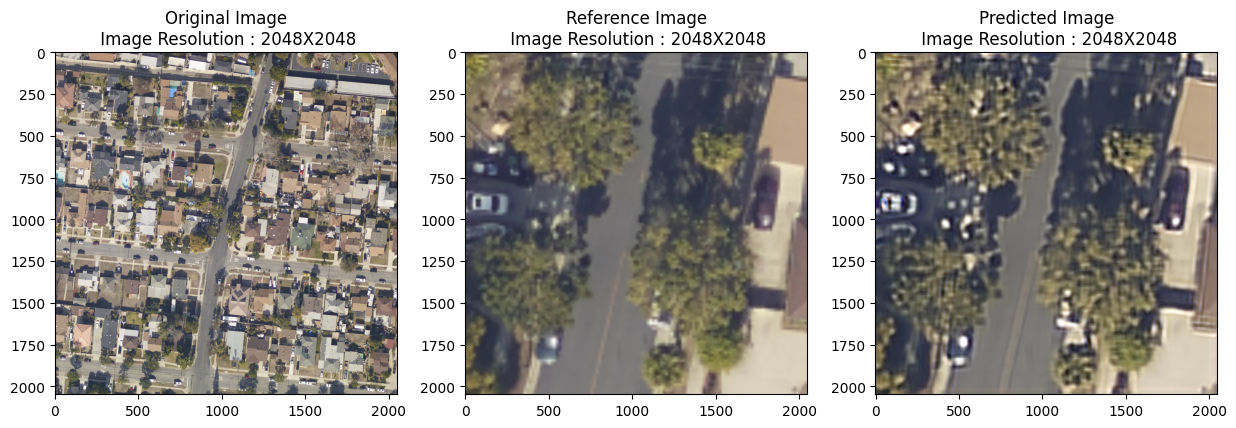

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.models import load_model
# SRCNN.save("SRCNN_e_"+ "20" +".h5")
def center_crop(image, size):
    height, width = image.shape[:2]
    target_height, target_width = size

    # Calculate crop coordinates
    start_y = max(0, int((height - target_height) / 2))
    end_y = start_y + target_height
    start_x = max(0, int((width - target_width) / 2))
    end_x = start_x + target_width

    # Perform center crop
    cropped_image = image[start_y:end_y, start_x:end_x]

    return cropped_image

loadded_model = load_model('./saved_models/SRCNN_e_20.h5', compile=False)

# Load and preprocess the original image
image_path = './test_images/test_image.jpg'
image = cv2.imread(image_path)
cropped_image = center_crop(image, (256, 256))
cropped_image = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)
cropped_image = cv2.resize(cropped_image, (256, 256))
cropped_image = cropped_image.astype('float32') / 255.0
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = image.astype('float32') / 255.0

# Make a prediction
prediction = loadded_model.predict(np.expand_dims(cropped_image, axis=0))[0]
prediction = np.clip(prediction, 0, 1)  # Clip values between 0 and 1

cropped_image = cv2.resize(cropped_image, (cropped_image.shape[0]//2, cropped_image.shape[1]//2))
cropped_image = cv2.resize(cropped_image, (image.shape[0], image.shape[1]))
prediction = cv2.resize(prediction, (image.shape[0], image.shape[1]))
# Display the images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image)
axes[0].set_title(f'Original Image\n Image Resolution : {image.shape[0]}X{image.shape[1]}')
axes[1].imshow(cropped_image)
axes[1].set_title(f'Reference Image\n Image Resolution : {cropped_image.shape[0]}X{cropped_image.shape[1]}')
axes[2].imshow(prediction)
axes[2].set_title(f'Predicted Image\n Image Resolution : {prediction.shape[0]}X{prediction.shape[1]}')
plt.show()
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
cropped_image = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)
prediction = cv2.cvtColor(prediction, cv2.COLOR_RGB2BGR)


In [9]:
cv2.imshow('Original Image',image)
cv2.imshow('Reference Image',cropped_image)
cv2.imshow('Predicted Image',prediction)
cv2.waitKey(0)
cv2.destroyAllWindows()